In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings('ignore')

from experiment_code import constants as const
from experiment_code.participants.participant_database_ana import AtaxiaAna, ControlAna
from experiment_code.visualization.visualize_participants import AtaxiaAna, ControlAna

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
con = ControlAna()

In [3]:
df_con = con.preprocess_dataframe()

In [4]:
atx = AtaxiaAna()

In [5]:
df_atx = atx.preprocess_dataframe()

In [6]:
df_atx.columns

Index(['subj_id', 'date_of_testing', 'online_frequency', 'group',
       'principal_investigator', 'experimenter', 'exp_id', 'payment_method',
       'in person', 'dob', 'handedness', 'gender', 'years_of_education',
       'neuro_taken', 'moca_taken', 'current_medications',
       'sig_medical_changes', 'performance_quality', 'comments',
       'MOCA_total_score', 'MOCA_relative_score(fraction)', 'MOCA_nonmotor',
       'moca_vs', 'moca_name', 'moca_att', 'moca_lang', 'moca_abst',
       'moca_recall', 'moca_orient', 'SARA_total_score',
       'SARA_relative_score(fraction)', 'sara_self_report_1-3',
       'sara_observe_4-8', 'sara_gait_1', 'sara_stance_2', 'sara_sitting_3',
       'sara_speech_4', 'sara_finger_chase_5r', 'sara_finger_chase_5l',
       'sara_finger_chase_5av', 'sara_finger_nose_6r', 'sara_finger_nose_6l',
       'sara_finger_nose_6av', 'sara_pronate_supinate_7r',
       'sara_pronate_supinate_7l', 'sara_pronate_supinate_7av',
       'sara_heel_shin_8r', 'sara_heel_shin

In [26]:
os.chdir(const.Defaults.PROCESSED_DIR)
df = pd.read_csv("merged_preprocessed_dataframe.csv")
df.columns #change format (e.g.index=False)

Index(['Unnamed: 0', 'local_date', 'experiment_id', 'experiment_version',
       'participant_public_id', 'participant_id', 'task_name', 'task_version',
       'spreadsheet_version', 'spreadsheet_row', 'sentence_num', 'zone_type',
       'rt', 'response', 'attempt', 'correct', 'incorrect', 'display',
       'block_num', 'randomise_blocks', 'full_sentence', 'last_word',
       'sampled', 'CoRT_descript', 'CoRT_mean', 'condition_name', 'CoRT_std',
       'cloze_descript', 'cloze_probability', 'dataset', 'random_word',
       'target_word', 'word_count', 'group', 'cause_effect', 'dynamic_verb',
       'orientation', 'negative', 'tense', 'spelling_modified', 'trial_type',
       'version', 'version_descript', 'group_cloze_condition',
       'group_CoRT_condition', 'group_trial_type', 'cloze_cort', 'public_id',
       'gender', 'years_of_education', 'age', 'MOCA_mean', 'MOCA_std',
       'SARA_mean', 'SARA_std'],
      dtype='object')

In [33]:
df_sca = df.query('group=="patient"')
df_con = df.query('group=="control"')

In [36]:
print(df_con.years_of_education.mean(), ', ', df_con.years_of_education.std())
print(df_con.age.mean(), ', ', df_con.age.std())
print(df_con.MOCA_mean.mean(), ', ', df_con.MOCA_mean.std())
#print(df.SARA_mean.mean(), ', ', df.SARA_mean.std())

16.4375 ,  2.344603893093851
52.14965753424658 ,  12.029629076005712
26.21875 ,  2.755767894935986


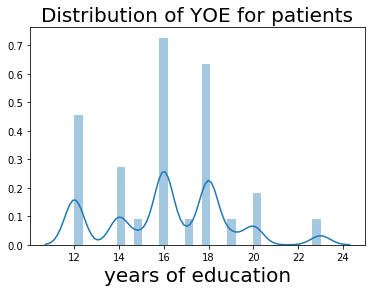

16.20689655172414 ,  2.6959825423786006


In [25]:



sns.distplot(df['years_of_education'])
plt.xlabel('years of education', fontsize=20)
plt.title('Distribution of YOE', fontsize=20);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

plt.show()

print(df.years_of_education.mean(), ', ', df.years_of_education.std())

In [22]:
selected_patients = ["OC4","OC6","AC112","AC102","AC118","AC52","AC80","AC111","AC132",
                     "AC105","AC1001","AC1004","AC1006","AC152","AC161","AC33",
                     "AC1059","AC153","AC158","AC159","AC1027","AC148"]
patients = df_atx[df_atx.subj_id.isin(selected_patients)]

AttributeError: 'Line2D' object has no property 'hue'

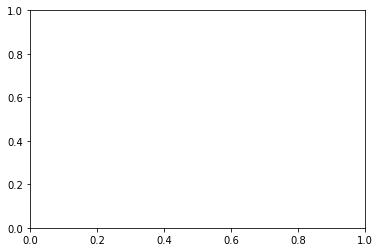

In [23]:
sns.kdeplot(patients['years_of_education'], hue = 'group', multiple="stack")
plt.xlabel('years of education', fontsize=20)
plt.title('Distribution of YOE for selected patients', fontsize=20);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

plt.show()
print(df_atx.years_of_education.mean(), ', ', df_atx.years_of_education.std())

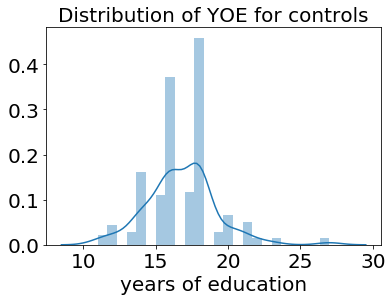

In [10]:
df_con = df_con[df_con.years_of_education != '13-16']
df_con = df_con[df_con.years_of_education != '20+']
df_con['years_of_education'].values
sns.distplot(df_con['years_of_education'])
plt.xlabel('years of education', fontsize=20)
plt.title('Distribution of YOE for controls', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

plt.show()

In [11]:
selected_controls = ["OC79", "OC83", "OC90", "OC91", "OC92", "OC93", "OC94", "OC95", 
                     "OC96", "OC140", "OC144", "OC146", "OC147"]
controls = df_con[df_con.subj_id.isin(selected_controls)]

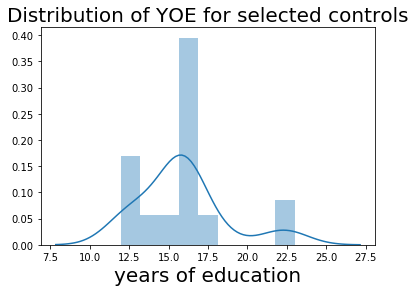

In [12]:
controls['years_of_education'].values
sns.distplot(controls['years_of_education'])
plt.xlabel('years of education', fontsize=20)
plt.title('Distribution of YOE for selected controls', fontsize=20);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

plt.show()

TypeError: '<=' not supported between instances of 'float' and 'str'

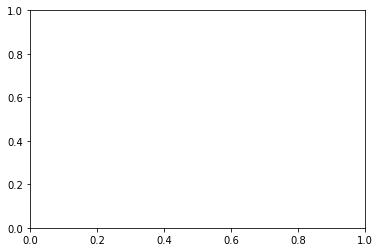

In [13]:
plt.hist(df_atx["years_of_education"], label='years_of_education')
plt.hist(df_con["years_of_education"], label='years_of_education')
plt.legend(loc='upper right')
plt.show()

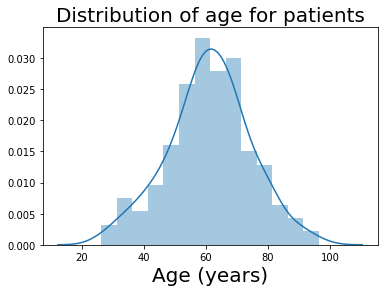

In [14]:
sns.distplot(df_atx['age'])
plt.xlabel('Age (years)', fontsize=20)
plt.title('Distribution of age for patients', fontsize=20);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

plt.show()

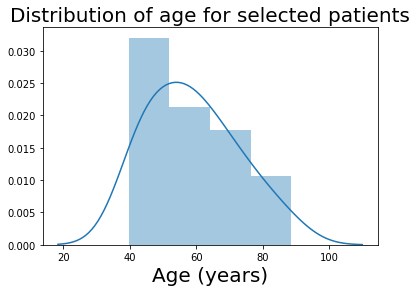

In [15]:
sns.distplot(patients['age'])
plt.xlabel('Age (years)', fontsize=20)
plt.title('Distribution of age for selected patients', fontsize=20);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

plt.show()

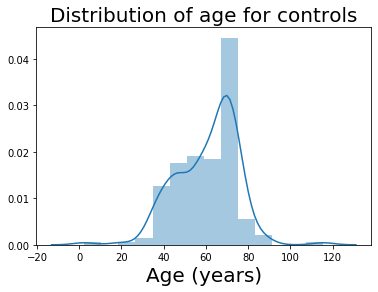

In [16]:
sns.distplot(df_con['age'])
plt.xlabel('Age (years)', fontsize=20)
plt.title('Distribution of age for controls', fontsize=20);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

plt.show()

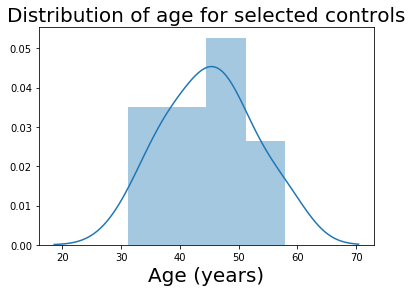

In [17]:
controls['age'].values
sns.distplot(controls['age'])
plt.xlabel('Age (years)', fontsize=20)
plt.title('Distribution of age for selected controls', fontsize=20);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

plt.show()